In [1]:
"""本章涵盖以下内容：
 文件输入/输出；
 统计；
 信号处理；
 最优化；
 插值；
 图像和音频处理。
"""

'本章涵盖以下内容：\n\uf071 文件输入/输出；\n\uf071 统计；\n\uf071 信号处理；\n\uf071 最优化；\n\uf071 插值；\n\uf071 图像和音频处理。\n'

In [4]:
import numpy as np
from scipy import io

In [5]:
a = np.arange(7)
io.savemat("a.mat",{"array":a})

In [6]:
b = io.loadmat("a.mat")

In [7]:
b

{'__header__': b'MATLAB 5.0 MAT-file Platform: nt, Created on: Sat Jan  9 20:29:35 2021',
 '__version__': '1.0',
 '__globals__': [],
 'array': array([[0, 1, 2, 3, 4, 5, 6]])}

In [15]:
"""我们将按正态分布生成随机数，并使用scipy.stats包中的统计函数分析生成的数据"""


'我们将按正态分布生成随机数，并使用scipy.stats包中的统计函数分析生成的数据'

In [44]:
from scipy import stats

In [45]:
# 使用scipy.stats包按正态分布生成随机数
generated = stats.norm.rvs(size=100)

In [46]:
generated

array([ 2.41022389,  2.04028418, -0.15658863, -0.80386103,  0.70807872,
       -0.32547211,  0.44530021, -0.17012927, -0.76388074,  2.38324947,
        0.84334399, -1.49423799, -1.02892168, -0.91217685, -0.51851095,
       -0.23404104,  0.15980744, -0.39706168,  0.14588971, -1.42022089,
       -0.01665106,  0.68088214, -0.11044628,  0.35849024, -0.46260841,
        0.15943706,  0.36680898, -0.14423675, -0.09589338,  0.57797367,
        0.06915346,  0.12986073,  0.8812835 , -0.74219295,  0.15845364,
        0.52110449,  1.72701166,  0.34880981,  0.07940259,  1.10424417,
        0.52731779,  0.03159032, -1.31978597, -0.44022864,  0.45343584,
       -0.67023128,  0.41109072, -0.99263308, -1.74903021,  0.78977439,
       -0.58181167,  1.11843983,  0.61452068, -2.26537975, -0.76601615,
       -0.79929303,  0.73359291, -0.75144056,  0.57302111,  2.99918194,
       -1.52788203,  0.58622615, -0.32686478,  0.50028125, -0.67200011,
       -2.03725785,  1.18575807, -1.28227947,  0.32499875, -1.57

In [47]:
# 用正态分布去拟合生成的数据，得到其均值和标准差
stats.norm.fit(generated)

(0.014866850793700289, 0.9850839688761137)

In [48]:
"""偏度（skewness）描述的是概率分布的偏斜（非对称）程度。我们来做一个偏度检验。
该检验有两个返回值，其中第二个返回值为p-value，即观察到的数据集服从正态分布的概率，取
值范围为0~1。"""

'偏度（skewness）描述的是概率分布的偏斜（非对称）程度。我们来做一个偏度检验。\n该检验有两个返回值，其中第二个返回值为p-value，即观察到的数据集服从正态分布的概率，取\n值范围为0~1。'

In [49]:
stats.skewtest(generated)

SkewtestResult(statistic=0.42105152096971477, pvalue=0.673717460718844)

In [50]:
"""峰度（kurtosis）描述的是概率分布曲线的陡峭程度。我们来做一个峰度检验。该检验与
偏度检验类似，当然这里是针对峰度。"""

'峰度（kurtosis）描述的是概率分布曲线的陡峭程度。我们来做一个峰度检验。该检验与\n偏度检验类似，当然这里是针对峰度。'

In [51]:
stats.kurtosistest(generated)

KurtosistestResult(statistic=1.8275269183685712, pvalue=0.06762058268833854)

In [52]:
"""正态性检验（normality test）可以检查数据集服从正态分布的程度。我们来做一个正态性
检验。该检验同样有两个返回值，其中第二个返回值为p-value。"""

'正态性检验（normality test）可以检查数据集服从正态分布的程度。我们来做一个正态性\n检验。该检验同样有两个返回值，其中第二个返回值为p-value。'

In [53]:
stats.normaltest(generated)

NormaltestResult(statistic=3.5171390206726367, pvalue=0.172291148334165)

In [54]:
"""使用SciPy我们可以很方便地得到数据所在的区段中某一百分比处的数值"""

'使用SciPy我们可以很方便地得到数据所在的区段中某一百分比处的数值'

In [55]:
print("95%处的数值如下：", stats.scoreatpercentile(generated, 95))

95%处的数值如下： 1.7426752904991876


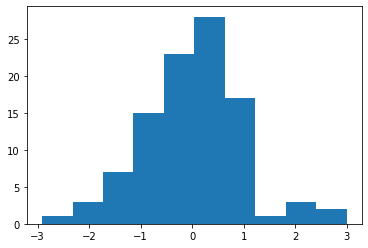

In [56]:
import matplotlib.pyplot as plt
plt.hist(generated)
plt.show()

In [65]:
from datetime import date
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import DayLocator
from matplotlib.dates import MonthLocator
import pandas_datareader.data as webdata
from dateutil.relativedelta import relativedelta

In [67]:
today = date.today()
start = today-relativedelta(years=1)
symbol = "QQQ"
quotes =webdata.get_data_yahoo(symbol, start, today)

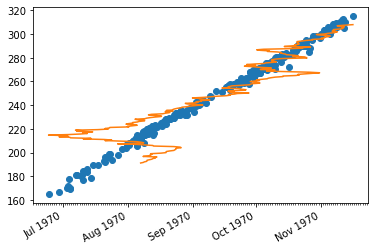

In [75]:
quotes = np.array(quotes)
# 编写代码获取QQQ的收盘价和对应的日期数据
dates = quotes.T[0]
qqq = quotes.T[1]
# 去除信号中的线性趋势。
y = signal.detrend(qqq)
# 创建月定位器和日定位器。
alldays = DayLocator()
months = MonthLocator()
# 创建一个日期格式化器以格式化x轴上的日期。该格式化器将创建一个字符串，包含简写的月份和年份。
month_formatter = DateFormatter("%b %Y")
# 创建图像和子图。
fig = plt.figure()
ax = fig.add_subplot(111)

# 绘制股价数据以及将去除趋势后的信号从原始数据中减去所得到的潜在趋势。
plt.plot(dates, qqq, 'o', dates, qqq - y,'-')

# 设置定位器和格式化器。
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_formatter)
# 将x轴上的标签格式化为日期。
fig.autofmt_xdate()
plt.show()

In [76]:
"""现实世界中的信号往往具有周期性。傅里叶变换（Fourier transform）是处理这些信号的常
用工具。傅里叶变换是一种从时域到频域的变换，也就是将周期信号线性分解为不同频率的正弦
和余弦函数。
傅里叶变换的函数可以在scipy.fftpack模块中找到（NumPy也有自己的傅里叶工具包，
即numpy.fft）。这个模块包含快速傅里叶变换、微分算子和拟微分算子以及一些辅助函数。
MATLAB用户会很高兴，因为scipy.fftpack模块中的很多函数与MATLAB对应的函数同名，
且功能也很相近。"""

'现实世界中的信号往往具有周期性。傅里叶变换（Fourier transform）是处理这些信号的常\n用工具。傅里叶变换是一种从时域到频域的变换，也就是将周期信号线性分解为不同频率的正弦\n和余弦函数。\n傅里叶变换的函数可以在scipy.fftpack模块中找到（NumPy也有自己的傅里叶工具包，\n即numpy.fft）。这个模块包含快速傅里叶变换、微分算子和拟微分算子以及一些辅助函数。\nMATLAB用户会很高兴，因为scipy.fftpack模块中的很多函数与MATLAB对应的函数同名，\n且功能也很相近。'

In [77]:
import pandas_datareader.data as webdata
from datetime import date
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy import fftpack
from matplotlib.dates import DateFormatter
from matplotlib.dates import DayLocator
from matplotlib.dates import MonthLocator
from dateutil.relativedelta import relativedelta

In [81]:
today = date.today()
start = today- relativedelta(years=1)

quotes = webdata.get_data_yahoo("QQQ", start, today)

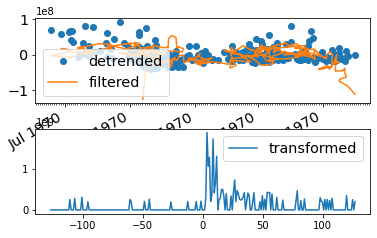

In [83]:
quotes = np.array(quotes)
dates = quotes.T[0]
qqq = quotes.T[4]
# 去除信号中的线性趋势。
y = signal.detrend(qqq)

alldays = DayLocator()
months = MonthLocator()
month_formatter = DateFormatter("%b %Y")

fig = plt.figure()
fig.subplots_adjust(hspace=.3)
ax = fig.add_subplot(211)

ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(month_formatter)

# 调大字号
ax.tick_params(axis='both', which='major', labelsize='x-large')

# 应用傅里叶变换，得到信号的频谱
amps = np.abs(fftpack.fftshift(fftpack.rfft(y)))

# 滤除噪声。如果某一频率分量的大小低于最强分量的10%，则将其滤除
amps[amps < 0.1*amps.max()] = 0

# 将滤波后的信号变换回时域，并和去除趋势后的信号一起绘制出来。
plt.plot(dates, y,'o', label='detrended')
plt.plot(dates, -fftpack.irfft(fftpack.ifftshift(amps)),label="filtered")

# 将x轴上的标签格式化为日期，并添加一个特大号的图例。
fig.autofmt_xdate()
plt.legend(prop={'size':'x-large'})

# 添加第二个子图，绘制滤波后的频谱。
ax2 = fig.add_subplot(212)
N = len(qqq)
plt.plot(np.linspace(-N/2, N/2, N), amps, label="transformed")

# 显示图像和图例
plt.legend(prop={'size':'x-large'})
plt.show()

In [84]:
"""优化算法（optimization algorithm）尝试寻求某一问题的最优解，例如找到函数的最大值或
最小值，函数可以是线性或者非线性的。解可能有一些特定的约束，例如不允许有负数。在
scipy.optimize模块中提供了一些优化算法，最小二乘法函数leastsq就是其中之一。当调用
这个函数时，我们需要提供一个残差（误差项）函数。这样，leastsq将最小化残差的平方和。
得到的解与我们使用的数学模型有关。我们还需要为算法提供一个起始点，这应该是一个最好的
猜测——尽可能接近真实解。否则，程序执行800轮迭代后将停止。
"""

'优化算法（optimization algorithm）尝试寻求某一问题的最优解，例如找到函数的最大值或\n最小值，函数可以是线性或者非线性的。解可能有一些特定的约束，例如不允许有负数。在\nscipy.optimize模块中提供了一些优化算法，最小二乘法函数leastsq就是其中之一。当调用\n这个函数时，我们需要提供一个残差（误差项）函数。这样，leastsq将最小化残差的平方和。\n得到的解与我们使用的数学模型有关。我们还需要为算法提供一个起始点，这应该是一个最好的\n猜测——尽可能接近真实解。否则，程序执行800轮迭代后将停止。\n'

In [87]:
# 我们可以使用scipy.ndimage包进行图像处理。该模块包含各种图像滤波器和工具函数。
from scipy import misc
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

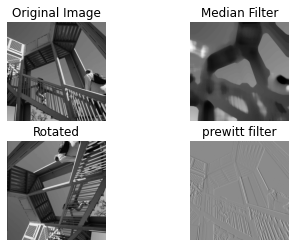

In [98]:
# 载入图像，并使用灰度颜色表将其在子图中显示出来
image = misc.ascent().astype(np.float32)
plt.subplot(221)
plt.title("Original Image")
img = plt.imshow(image, cmap=plt.cm.gray)
plt.axis("off")

# 中值滤波器扫描信号的每一个数据点，并替换为相邻数据点的中值。对图像应用中值滤波器并显示在第二个子图中。
plt.subplot(222)
plt.title("Median Filter")
filtered = ndimage.median_filter(image, size=(42,42))
plt.imshow(filtered,cmap=plt.cm.gray)
plt.axis("off")

# 旋转图像并显示在第三个子图中
plt.subplot(223)
plt.title("Rotated")
rotated = ndimage.rotate(image, 90)
plt.imshow(rotated, cmap=plt.cm.gray)
plt.axis("off")

# Prewitt滤波器是基于图像强度的梯度计算。对图像应用Prewitt滤波器并显示在第四个子图中。
plt.subplot(224)
plt.title("prewitt filter")
filtered = ndimage.prewitt(image)
plt.imshow(filtered,cmap=plt.cm.gray)
plt.axis("off")
plt.show()

In [104]:
# 音频处理
from scipy.io import wavfile
import matplotlib.pyplot as plt
from urllib import request
import numpy as np
import sys

In [105]:
response = request.urlopen('http://www.thesoundarchive.com/austinpowers/smashingbaby.wav')

In [106]:
response.info()

In [107]:
print(response.info())

Content-Type: audio/wav
Last-Modified: Tue, 12 Aug 2014 15:53:38 GMT
Accept-Ranges: bytes
ETag: "ac20ba9445b6cf1:0"
Server: Microsoft-IIS/8.5
X-Powered-By: ASP.NET
Date: Sat, 09 Jan 2021 17:11:44 GMT
Connection: close
Content-Length: 43642




In [119]:
WAVE_FILE = "smashingbaby.wav"
filehandle = open(WAVE_FILE,'wb')
filehandle.write(response.read())
filehandle.close()
sample.rate, data = wavfile.read(WAVE_FILE)
print("data type:",data.dtype,"Shape:",data,shape)

AttributeError: 'bytes' object has no attribute 'astype'

In [122]:
(rate,sample) = wavfile.read(response.read())
wavfile.write("/temp.wav", rate, sample)

FileNotFoundError: [Errno 2] No such file or directory: b''